# TEAM PARIS 

# LP1 

# Data Analysis Project - Indian Start-up Funding Analysis

# Project Description 

Our team is trying to venture into the Indian start-up ecosystem. As the data experts of the team we are to investigate the ecosystem and propose the best course of action. 

Our task is to develop a unique story from this dataset by stating and
testing a hypothesis, asking questions, perform analysis and share
insights with appropriate visualisations.

So as part of the project you are to:

-   Ask questions

-   Develop hypothesis

-   Process the data

-   Analyse the data

-   Visualise the data

-   Test our Hypothesis 

-  Merge and publish to PowerbI

# Questions 

1. At what stage did most companies received funding ?


2. Does the location influence of the most funding stage  ?
   

3. a) What are the top 10 most funded companies/sectors ? 
   
   b) What stage are the the top 10 most funded companies/sectors ? 
   

4. What city/ location does the most funding go to ?

    (Regardless of stage , since Question 2 addressed part of it)


5. Who are the most Funding investors for the most funded year ?

   ( For the years 2019, 2020)
   
   
6. What has the funding over the years trend been like ? 
    
    a) What year was the most funding given ? 
    
    b) What is the average funding for every year ? 

    c) What is the % increase in funding from year to year ?

# HYPOTHESIS  



## Hypothesis 
#### Funding has been increasing over the years 


##  Alternate Hypothesis
#### Funding has remained constant over the years  

# IMPORT LIBRARIES 

In [1]:
import pandas as pd 

import numpy as np 
 
import seaborn as sns 

import matplotlib.pyplot as plt 


#import Summarytools 
#pip install pynput

import warnings
warnings.filterwarnings('ignore')


# IMPORTING THE DATASETS

In [2]:
funding_2018 = pd.read_csv('startup_funding2018.csv')
funding_2019 = pd.read_csv('startup_funding2019.csv')
funding_2020 = pd.read_csv('startup_funding2020.csv')
funding_2021 = pd.read_csv('startup_funding2021.csv')

In [3]:
# LOOK AT AN OVERVIEW OF OUR DATASET

In [4]:
funding_2019.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding


In [5]:
funding_2020.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN


In [6]:
funding_2021.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D


 LOOK AT THE COLUMNS 

In [7]:
columns_2018 = pd.DataFrame(funding_2018.columns.values.tolist())
columns_2019 = pd.DataFrame(funding_2019.columns.values.tolist())
columns_2020 = pd.DataFrame(funding_2020.columns.values.tolist())
columns_2021 = pd.DataFrame(funding_2021.columns.values.tolist())

In [8]:
# Get the columns 
inner =columns_2019.join(columns_2018, lsuffix='_columns_2018')
inner2 = columns_2020.join(columns_2021, lsuffix='_columns_2020')
joined = inner.join(inner2, lsuffix='_2019')

# RENAME COLUMN
column_names = joined
new = column_names.rename( columns = 
                          {'0_columns_2018':' 2019_column',
                           '0_2019': '2018_columns', 
                           '0_columns_2020' : '2020_columns',
                           '0' :'2021_columns'})
new

,2019_column,2018_columns,2020_columns,2021_columns
0,Company/Brand,Company Name,Company/Brand,Company/Brand
1,Founded,Industry,Founded,Founded
2,HeadQuarter,Round/Series,HeadQuarter,HeadQuarter
3,Sector,Amount,Sector,Sector
4,What it does,Location,What it does,What it does
5,Founders,About Company,Founders,Founders
6,Investor,NaN,Investor,Investor
7,Amount($),NaN,Amount($),Amount($)
8,Stage,NaN,Stage,Stage


## Deductions from overview of the data 

**DEDUCTIONS** 
1. Round/series in 2018 column is similar to Stage in the 2019/2021/2020 dataset


2. Industry in 2018 column is similar to Sector in the 2019/2021/2020 dataset


3. 2018_column set doesn't have 3 columns, YearFounded, Founder, Investor information 


4. 2019 dataset investors are undisclosed


5. Location in 2018 is similar to HeadQuater in 2019-2021


6. Add date column to the  dataset and populate it 


In [9]:
new

,2019_column,2018_columns,2020_columns,2021_columns
0,Company/Brand,Company Name,Company/Brand,Company/Brand
1,Founded,Industry,Founded,Founded
2,HeadQuarter,Round/Series,HeadQuarter,HeadQuarter
3,Sector,Amount,Sector,Sector
4,What it does,Location,What it does,What it does
5,Founders,About Company,Founders,Founders
6,Investor,NaN,Investor,Investor
7,Amount($),NaN,Amount($),Amount($)
8,Stage,NaN,Stage,Stage


In [10]:
# RENAME COLUMN 2018

columns_2018 = funding_2018.rename( columns = 
                          {'Company Name':'Company/Brand',
                           'Industry': 'Sector', 
                           'Round/Series': 'Stage',
                           'Amount' :'Amount($)',
                           'Location':'HeadQuarter',
                           'About Company' : 'What it does'})

columns_2018.head(0
                 )

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does


In [11]:
# Dataset 
# 1.columns_2018
# 2. funding_2019
# 3. funding_2020
# 4. funding_2021

In [12]:
print(columns_2018.shape)
print(funding_2019.shape)
print(funding_2020.shape)
print(funding_2021.shape)

(526, 6)
(89, 9)
(1055, 10)
(1209, 9)


In [13]:
columns_2018['Year'] = ['2018']*526
funding_2019['Year'] = ['2019']*89
funding_2020['Year'] = ['2020']*1055
funding_2021['Year'] = ['2021']*1209

In [14]:
# Look at the datasets with date column added 
print( '2018', columns_2018.head(0))
print('2019' , funding_2019.head(0))
print( '2020' , funding_2020.head(0))
print('2021' , funding_2021.head(0))

2018 Empty DataFrame
Columns: [Company/Brand, Sector, Stage, Amount($), HeadQuarter, What it does, Year]
Index: []
2019 Empty DataFrame
Columns: [Company/Brand, Founded, HeadQuarter, Sector, What it does, Founders, Investor, Amount($), Stage, Year]
Index: []
2020 Empty DataFrame
Columns: [Company/Brand, Founded, HeadQuarter, Sector, What it does, Founders, Investor, Amount($), Stage, Unnamed: 9, Year]
Index: []
2021 Empty DataFrame
Columns: [Company/Brand, Founded, HeadQuarter, Sector, What it does, Founders, Investor, Amount($), Stage, Year]
Index: []


In [15]:
# Check the contents of column "Unnamed: 9 " in 2020 dataset 

funding_2020['Unnamed: 9'].isna().sum()

#funding_2020.info()

1053

It has many null values , and it is not in itself useful in our analysis so we drop it.

In [16]:
# In the 2020 dataset drop the Unnamed: 9 column since only 2 values are not null 

columns_2020 = funding_2020.drop('Unnamed: 9', axis = 1)

In [17]:
columns_2020.head(0)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year


In [18]:
# For the original 2018 dataset , remove the non-digits characters and multiply the digit characters with dollar equivalent 

columns_2018.head(3)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018


In [19]:
#columns2_2018 = combined_data2.apply(lambda x: x.str.replace('₹',''))

columns_2018_2 = columns_2018[columns_2018['Amount($)'].apply(lambda x: str(x).isdigit())]

In [20]:
columns_2018_2['Amount($)'].unique()

array(['250000', '2000000', '1600000', '150000', '1100000', '6000000',
       '650000', '1000000', '5000000', '4000000', '2800000', '1700000',
       '1300000', '500000', '13400000', '9000000', '100000', '20000',
       '120000', '1400000', '1200000', '2200000', '1800000', '3600000',
       '300000', '6830000', '200000', '4300000', '364846', '400000',
       '1500000', '13200000', '50000', '3000000', '1250000', '180000',
       '4200000', '175000', '1450000', '4500000', '600000', '15000000',
       '125000', '130000', '17200000', '3500000', '12000000', '22000000',
       '70000', '10000000', '185000000', '65000000', '700000', '30000000',
       '210000000', '75000000', '1760000', '2700000', '750000', '2500000',
       '80000000', '25000000', '3700000', '5600000', '99230000',
       '70000000', '40000', '550000', '50000000', '365000000', '28000000',
       '100000000', '14900000', '225000000', '7500', '35000000'],
      dtype=object)

In [21]:
columns_2018_2['Amount($)'].head(2)

0     250000
3    2000000
Name: Amount($), dtype: object

In [22]:
columns_2018_2['Amount($)'].dtype

dtype('O')

In [23]:
columns_2018_2['Amount($)'] = columns_2018_2['Amount($)'].astype('int64')

In [24]:
columns_2018_2['Amount($)'].dtype

dtype('int64')

In [25]:
 columns_2018_2['Amount($)'] = columns_2018_2['Amount($)'].apply(lambda x: x/68.41)

The above code runs in the dataset and fetches only digits datatypes, 



In [26]:
columns_2018_2.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3654.436486,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
3,PayMe India,"Financial Services, FinTech",Angel,29235.491887,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,23388.393510,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,2018
16,Mihuru,"Finance, Internet, Travel",Seed,2192.661892,"Mumbai, Maharashtra, India",Mihuru is an online platform which gives micro...,2018
17,Fyle,"Accounting, Business Information Systems, Busi...",Seed,16079.520538,"Bengaluru, Karnataka, India",Fyle is an intelligent expense management plat...,2018


Datasets to now work on 
 1. columns_2018_2
 2. funding_2019
 3. columns_2020
 4. funding_2021

In [27]:
# combining our datasets 

combined_data = pd.concat([columns_2018_2 , funding_2019,columns_2020, funding_2021], ignore_index = True)

In [28]:
combined_data.head(5)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3654.436486,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,PayMe India,"Financial Services, FinTech",Angel,29235.491887,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
2,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,23388.39351,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN
3,Mihuru,"Finance, Internet, Travel",Seed,2192.661892,"Mumbai, Maharashtra, India",Mihuru is an online platform which gives micro...,2018,NaN,NaN,NaN
4,Fyle,"Accounting, Business Information Systems, Busi...",Seed,16079.520538,"Bengaluru, Karnataka, India",Fyle is an intelligent expense management plat...,2018,NaN,NaN,NaN


In [29]:
combined_data.shape

(2528, 10)

In [30]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2528 non-null   object
 1   Sector         2510 non-null   object
 2   Stage          1590 non-null   object
 3   Amount($)      2522 non-null   object
 4   HeadQuarter    2414 non-null   object
 5   What it does   2528 non-null   object
 6   Year           2528 non-null   object
 7   Founded        2111 non-null   object
 8   Founders       2334 non-null   object
 9   Investor       2253 non-null   object
dtypes: object(10)
memory usage: 197.6+ KB


In [31]:
combined_data.shape

(2528, 10)



# UNIVARIATE ANALYSIS 



In [32]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2528 non-null   object
 1   Sector         2510 non-null   object
 2   Stage          1590 non-null   object
 3   Amount($)      2522 non-null   object
 4   HeadQuarter    2414 non-null   object
 5   What it does   2528 non-null   object
 6   Year           2528 non-null   object
 7   Founded        2111 non-null   object
 8   Founders       2334 non-null   object
 9   Investor       2253 non-null   object
dtypes: object(10)
memory usage: 197.6+ KB


## DEEP DIVE COMPANY/BRAND 

In [33]:
#with pd.option_context('display.max_rows', None, ):
    #print(combined_data['Company/Brand'])

In [34]:
#Check the dtype , 
combined_data['Company/Brand'].dtype

dtype('O')

In [35]:
# use value_counts to find out if the company/brand is groupable ?
combined_data['Company/Brand'].value_counts().head(5)

BharatPe    10
Zomato       7
Zetwerk      6
MPL          6
Trell        6
Name: Company/Brand, dtype: int64

In [36]:
combined_data['Company/Brand'].describe()

count         2528
unique        1933
top       BharatPe
freq            10
Name: Company/Brand, dtype: object

In [37]:
combined_data['Company/Brand'].isna().sum()

0

**Deductions** 
There are no missing values in the dataset

## DEEP DIVE SECTOR 

In [38]:
combined_data['Sector'].value_counts().unique

<bound method Series.unique of FinTech                       173
EdTech                        142
Fintech                        85
Edtech                         74
E-commerce                     73
                             ... 
Fusion beverages                1
AI platform                     1
Conversational AI platform      1
Consumer appliances             1
Staffing & Recruiting           1
Name: Sector, Length: 636, dtype: int64>

In [39]:
combined_data['Sector'].dtype

dtype('O')

In [40]:
#check for missing values 
combined_data['Sector'].isna().sum()

18

In [41]:
print ('The percentage of missing values is ', 18/2879*100)

The percentage of missing values is  0.6252170892671066


In [42]:
#with pd.option_context('display.max_rows', None,):
    #print(combined_data['Sector'])

**Deductions**
1. There are 0.6% of missing data , because this is negligible, It shall be dropped 

## STAGE DEEP DIVE 

In [43]:
combined_data['Stage'].describe()

count     1590
unique      72
top       Seed
freq       416
Name: Stage, dtype: object

In [44]:
combined_data['Stage'].isna().sum()

938

In [45]:
combined_data.shape

(2528, 10)

In [46]:
p = 938/2879*100

print('Percentage of missing values here is ', p)

Percentage of missing values here is  32.58075720736367


In [47]:
combined_data['Stage'].dtype

dtype('O')

In [48]:
combined_data['Stage'].value_counts().head(10)

Seed            416
Series A        273
Pre-series A    211
Series B        115
Series C        106
Seed Round       69
Pre series A     62
Pre-seed         58
Series D         48
Debt             45
Name: Stage, dtype: int64

In [49]:
#Renaming the pre series A to be similar 

combined_data.replace(to_replace = ['Pre-series A', 'Pre series A', ' NaN' ], value = ['Pre Series A', 'Pre Series A', 'undisclosed'])

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3654.436486,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,PayMe India,"Financial Services, FinTech",Angel,29235.491887,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
2,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,23388.39351,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN
3,Mihuru,"Finance, Internet, Travel",Seed,2192.661892,"Mumbai, Maharashtra, India",Mihuru is an online platform which gives micro...,2018,NaN,NaN,NaN
4,Fyle,"Accounting, Business Information Systems, Busi...",Seed,16079.520538,"Bengaluru, Karnataka, India",Fyle is an intelligent expense management plat...,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2523,Gigforce,Staffing & Recruiting,Pre Series A,$3000000,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2524,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC
2525,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2526,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [50]:
# Renaming our missing values from NaN to undisclosed 

combined_data.fillna({'Stage':'undisclosed'}, inplace = True)

In [51]:
# See if the null values have been renamed 

#with pd.option_context('display.max_rows', None,):
    #print(combined_data['Stage'])

**Deductions**

1. We have 32% of missing data.


2. The Pre Series A, has been renamed differently in the the dataset 

**Solution**

1. With the nature of our Question 1, We cannot ignore 32% of missing data here. The stage being crucial to our analysis. We shall therefore rename to undisclosed 


2. Rename all the pre series A 

##  AMOUNT()	DEEP DIVE

In [52]:
combined_data['Amount($)'].describe()

count            2522
unique            604
top       Undisclosed
freq              298
Name: Amount($), dtype: object

In [53]:
#combined_data['Amount($)'].unique()

In [54]:
combined_data['Amount($)'].isna().sum()

6

1. Remove rowns with undisclosed 


2. since the header is indicated to be '$' assumption  is  the  Japanes  Yen ought to be converted to $


3. Since we have many outliers , fill in missing values with median 


4. change the Dtype from O type to int

In [55]:
# remove $ replace with empty space
remove1 = combined_data.apply(lambda x: x.str.replace('$',''))

#remove the jy replace with empty space
remove2 = remove1.apply(lambda x: x.str.replace('₹',''))

#remove the , replace with empty space
remove3 = remove2.apply(lambda x: x.str.replace(',',''))

In [56]:
new2 = remove3[remove3['Amount($)'].apply(lambda x: str(x).isdigit())]

In [57]:
new2

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founded,Founders,Investor
175,Bombay Shaving,Ecommerce,undisclosed,6300000,NaN,Provides a range of male grooming products,2019,NaN,Shantanu Deshpande,Sixth Sense Ventures
176,Ruangguru,Edtech,Series C,150000000,Mumbai,A learning platform that provides topic-based ...,2019,NaN,Adamas Belva Syah Devara Iman Usman.,General Atlantic
177,Eduisfun,Edtech,Fresh funding,28000000,Mumbai,It aims to make learning fun via games.,2019,NaN,Jatin Solanki,Deepak Parekh Amitabh Bachchan Piyush Pandey
178,HomeLane,Interior design,Series D,30000000,Chennai,Provides interior designing solutions,2019,NaN,Srikanth Iyer Rama Harinath,Evolvence India Fund (EIF) Pidilite Group FJ Labs
179,Nu Genes,AgriTech,undisclosed,6000000,Telangana,It is a seed company engaged in production pro...,2019,NaN,Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA)
...,...,...,...,...,...,...,...,...,...,...
2523,Gigforce,Staffing & Recruiting,Pre-series A,3000000,Gurugram,A gig/on-demand staffing company.,2021,NaN,Chirag Mittal Anirudh Syal,Endiya Partners
2524,Vahdam,Food & Beverages,Series D,20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021,NaN,Bala Sarda,IIFL AMC
2525,Leap Finance,Financial Services,Series C,55000000,Bangalore,International education loans for high potenti...,2021,NaN,Arnav Kumar Vaibhav Singh,Owl Ventures
2526,CollegeDekho,EdTech,Series B,26000000,Gurugram,Collegedekho.com is Student’s Partner Friend &...,2021,NaN,Ruchir Arora,Winter Capital ETS Man Capital


In [58]:
new2['Amount($)'].astype('int64')

175       6300000
176     150000000
177      28000000
178      30000000
179       6000000
          ...    
2523      3000000
2524     20000000
2525     55000000
2526     26000000
2527      8000000
Name: Amount($), Length: 1935, dtype: int64

## HEADQUATER  

In [59]:
new2['HeadQuarter'].dtype

dtype('O')

In [60]:
new2['HeadQuarter'].isna().sum()

94

In [61]:
new2['HeadQuarter'].shape

(1935,)

In [62]:
print ('The percentage of HeadQuater missing values', 94/1935*100)

The percentage of HeadQuater missing values 4.857881136950904


In [63]:
new2['HeadQuarter'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1935 entries, 175 to 2527
Series name: HeadQuarter
Non-Null Count  Dtype 
--------------  ----- 
1841 non-null   object
dtypes: object(1)
memory usage: 30.2+ KB


In [64]:
#impute the null values with most frequent since they are only 5%  

#Get the SimpleImputer from sklearn
from sklearn.impute import SimpleImputer 

#Create an instance of our imputer
imputer = SimpleImputer(strategy = 'most_frequent')

#Fit in our imputer to the data
imputer.fit_transform(new2)

array([['Bombay Shaving', 'Ecommerce', 'undisclosed', ..., '2015',
        'Shantanu Deshpande', 'Sixth Sense Ventures'],
       ['Ruangguru', 'Edtech', 'Series C', ..., '2015',
        'Adamas Belva Syah Devara Iman Usman.', 'General Atlantic'],
       ['Eduisfun', 'Edtech', 'Fresh funding', ..., '2015',
        'Jatin Solanki', 'Deepak Parekh Amitabh Bachchan Piyush Pandey'],
       ...,
       ['Leap Finance', 'Financial Services', 'Series C', ..., '2015',
        'Arnav Kumar Vaibhav Singh', 'Owl Ventures'],
       ['CollegeDekho', 'EdTech', 'Series B', ..., '2015',
        'Ruchir Arora', 'Winter Capital ETS Man Capital'],
       ['WeRize', 'Financial Services', 'Series A', ..., '2015',
        'Vishal Chopra Himanshu Gupta', '3one4 Capital Kalaari Capital']],
      dtype=object)

In [65]:
new2['HeadQuarter'].isna().sum()

94

In [66]:
# Check for the unqiue values for any anomaly 
#new2['HeadQuarter'].unique

In [67]:
#with pd.option_context('display.max_rows', None,):
    #print(new2['HeadQuarter'])

In [68]:
#Check using value_counts for the frequency occurence of top ten Locations 
new2['HeadQuarter'].value_counts().head(15)

Bangalore    644
Mumbai       308
Gurugram     209
New Delhi    149
Chennai       80
Pune          62
Hyderabad     53
Noida         52
Delhi         46
Gurgaon       23
Ahmedabad     19
Jaipur        16
Haryana       13
Kolkata       12
Thane         10
Name: HeadQuarter, dtype: int64

In [69]:
new2.head(2)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founded,Founders,Investor
175,Bombay Shaving,Ecommerce,undisclosed,6300000,NaN,Provides a range of male grooming products,2019,NaN,Shantanu Deshpande,Sixth Sense Ventures
176,Ruangguru,Edtech,Series C,150000000,Mumbai,A learning platform that provides topic-based ...,2019,NaN,Adamas Belva Syah Devara Iman Usman.,General Atlantic


## FOUNDED YEAR 

In [70]:
#check for is null values 
new2['Founded'].isna().sum()

1278

In [71]:
new2['Founded'].shape

(1935,)

In [72]:
# percentage of missing values 
a = 1278/1935*100
print(' Percentage of missing values is ' , a)

 Percentage of missing values is  66.04651162790698


In [73]:
# Look for probable reason for most missing values 
new

,2019_column,2018_columns,2020_columns,2021_columns
0,Company/Brand,Company Name,Company/Brand,Company/Brand
1,Founded,Industry,Founded,Founded
2,HeadQuarter,Round/Series,HeadQuarter,HeadQuarter
3,Sector,Amount,Sector,Sector
4,What it does,Location,What it does,What it does
5,Founders,About Company,Founders,Founders
6,Investor,NaN,Investor,Investor
7,Amount($),NaN,Amount($),Amount($)
8,Stage,NaN,Stage,Stage


In [74]:
# Drop that column 

new3 = new2.drop('Founded', axis=1)


The assumption would have been that since the 2018 dataset doesnt have the Founded column , then most missing values if maximum will be  a figure shy of 2018 dataset column_numbers, but the number is big. 
We have decided to drop the whole column. 

Why not use the founded year, and why we dont see it to be relevant 

## FOUNDERS COLUMN DEEP DIVE 

In [75]:
#look at the value counts 
new3['Founders'].value_counts()

Ashneer Grover Shashvat Nakrani          7
Byju Raveendran Divya Gokulnath          6
Byju Raveendran                          6
Sai Srinivas Kiran G Shubham Malhotra    5
Ritesh Agarwal                           5
                                        ..
Kishor Jha Praveen Kumar                 1
Sam Santhosh                             1
Anshul Bhagi Sandeep Bhagi               1
Lakshay Jain                             1
Vishal Chopra Himanshu Gupta             1
Name: Founders, Length: 1644, dtype: int64

In [76]:
#see what each column contains 
new3['Founders'].unique()

array(['Shantanu Deshpande', 'Adamas Belva Syah Devara Iman Usman.',
       'Jatin Solanki', ..., 'Bala Sarda', 'Arnav Kumar Vaibhav Singh',
       'Vishal Chopra Himanshu Gupta'], dtype=object)

In [77]:
#with pd.option_context('display.max_rows', None):
    #print(new3['Founders'])

## INVESTOR COLUMN  

In [78]:
new3['Investor'].value_counts().head(15)

Inflection Point Ventures    32
Venture Catalysts            14
Tiger Global                 12
Angel investors              11
Undisclosed                  10
Sequoia Capital India         9
Alteria Capital               9
Titan Capital                 8
Mumbai Angels Network         7
Trifecta Capital              7
Elevation Capital             7
Unicorn India Ventures        7
We Founder Circle             6
Sequoia India                 6
Nexus Venture Partners        6
Name: Investor, dtype: int64

In [79]:
new3.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founders,Investor
175,Bombay Shaving,Ecommerce,undisclosed,6300000,NaN,Provides a range of male grooming products,2019,Shantanu Deshpande,Sixth Sense Ventures
176,Ruangguru,Edtech,Series C,150000000,Mumbai,A learning platform that provides topic-based ...,2019,Adamas Belva Syah Devara Iman Usman.,General Atlantic
177,Eduisfun,Edtech,Fresh funding,28000000,Mumbai,It aims to make learning fun via games.,2019,Jatin Solanki,Deepak Parekh Amitabh Bachchan Piyush Pandey
178,HomeLane,Interior design,Series D,30000000,Chennai,Provides interior designing solutions,2019,Srikanth Iyer Rama Harinath,Evolvence India Fund (EIF) Pidilite Group FJ Labs
179,Nu Genes,AgriTech,undisclosed,6000000,Telangana,It is a seed company engaged in production pro...,2019,Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA)


In [80]:
new3.shape

(1935, 9)

In [81]:
new2['Investor'].isna().sum()

82

In [82]:
new2['Investor'].shape

(1935,)

In [83]:
# percentage of null values  
o  = 82/2313*100
print ('The percentage of missing values in the Investor column is ' , o , '%') 

The percentage of missing values in the Investor column is  3.545179420665802 %


In [84]:
new3['Investor'].unique()

array(['Sixth Sense Ventures', 'General Atlantic',
       'Deepak Parekh Amitabh Bachchan Piyush Pandey', ...,
       'Owl Ventures', 'Winter Capital ETS Man Capital',
       '3one4 Capital Kalaari Capital'], dtype=object)

In [85]:
#with pd.option_context('display.max_rows', None ):
    #print(new3['Investor'])

# YEAR COLUMN DEEP DIVE 

In [86]:
new3['Year'].value_counts()

2021    1056
2020     802
2019      77
Name: Year, dtype: int64

In [87]:
new3['Year'] = pd.to_datetime (new3['Year'] ).dt.year

In [88]:
new3['Year'].head()

175    2019
176    2019
177    2019
178    2019
179    2019
Name: Year, dtype: int64

# GET VISUAL BEFORE ANSWERING THE QUESTIONS 

In [89]:
new3.describe()

,Year
count,1935.000000
mean,2020.505943
std,0.574214
min,2019.000000
25%,2020.000000
50%,2021.000000
75%,2021.000000
max,2021.000000


In [90]:
new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1935 entries, 175 to 2527
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1935 non-null   object
 1   Sector         1919 non-null   object
 2   Stage          1935 non-null   object
 3   Amount($)      1935 non-null   object
 4   HeadQuarter    1841 non-null   object
 5   What it does   1935 non-null   object
 6   Year           1935 non-null   int64 
 7   Founders       1921 non-null   object
 8   Investor       1853 non-null   object
dtypes: int64(1), object(8)
memory usage: 151.2+ KB


In [91]:
#CONVERT MY DATASET COLUMNS TO THE RIGHT DTYPE 

In [92]:
new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1935 entries, 175 to 2527
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1935 non-null   object
 1   Sector         1919 non-null   object
 2   Stage          1935 non-null   object
 3   Amount($)      1935 non-null   object
 4   HeadQuarter    1841 non-null   object
 5   What it does   1935 non-null   object
 6   Year           1935 non-null   int64 
 7   Founders       1921 non-null   object
 8   Investor       1853 non-null   object
dtypes: int64(1), object(8)
memory usage: 151.2+ KB


In [93]:
new3['Amount($)'] = new3['Amount($)'].astype('int64')

new3['Year'] = pd.to_datetime (new3['Year'] ).dt.year

new3

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founders,Investor
175,Bombay Shaving,Ecommerce,undisclosed,6300000,NaN,Provides a range of male grooming products,1970,Shantanu Deshpande,Sixth Sense Ventures
176,Ruangguru,Edtech,Series C,150000000,Mumbai,A learning platform that provides topic-based ...,1970,Adamas Belva Syah Devara Iman Usman.,General Atlantic
177,Eduisfun,Edtech,Fresh funding,28000000,Mumbai,It aims to make learning fun via games.,1970,Jatin Solanki,Deepak Parekh Amitabh Bachchan Piyush Pandey
178,HomeLane,Interior design,Series D,30000000,Chennai,Provides interior designing solutions,1970,Srikanth Iyer Rama Harinath,Evolvence India Fund (EIF) Pidilite Group FJ Labs
179,Nu Genes,AgriTech,undisclosed,6000000,Telangana,It is a seed company engaged in production pro...,1970,Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA)
...,...,...,...,...,...,...,...,...,...
2523,Gigforce,Staffing & Recruiting,Pre-series A,3000000,Gurugram,A gig/on-demand staffing company.,1970,Chirag Mittal Anirudh Syal,Endiya Partners
2524,Vahdam,Food & Beverages,Series D,20000000,New Delhi,VAHDAM is among the world’s first vertically i...,1970,Bala Sarda,IIFL AMC
2525,Leap Finance,Financial Services,Series C,55000000,Bangalore,International education loans for high potenti...,1970,Arnav Kumar Vaibhav Singh,Owl Ventures
2526,CollegeDekho,EdTech,Series B,26000000,Gurugram,Collegedekho.com is Student’s Partner Friend &...,1970,Ruchir Arora,Winter Capital ETS Man Capital


# ANSWERING OUR QUESTIONS

1. At what stage did most companies received funding ?


2. Does the location influence of the most funding stage  ?
   

3. a) What are the top 10 most funded companies/sectors ? 
   
   b) What stage are the the top 10 most funded companies/sectors ? 
   

4. What city/ location does the most funding go to ?

    (Regardless of stage , since Question 2 addressed part of it)


5. Who are the most Funding investors for the most funded year ?

   ( For the years 2019, 2020)
   
   
6. What has the funding over the years trend been like ? 
    
    a) What year was the most funding given ? 
    
    b) What is the average funding for every year ? 

    c) What is the % increase in funding from year to year ?

# 1. At what stage did most companies received funding ?

In [94]:
# look at our dataset 
new3.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founders,Investor
175,Bombay Shaving,Ecommerce,undisclosed,6300000,NaN,Provides a range of male grooming products,1970,Shantanu Deshpande,Sixth Sense Ventures
176,Ruangguru,Edtech,Series C,150000000,Mumbai,A learning platform that provides topic-based ...,1970,Adamas Belva Syah Devara Iman Usman.,General Atlantic
177,Eduisfun,Edtech,Fresh funding,28000000,Mumbai,It aims to make learning fun via games.,1970,Jatin Solanki,Deepak Parekh Amitabh Bachchan Piyush Pandey
178,HomeLane,Interior design,Series D,30000000,Chennai,Provides interior designing solutions,1970,Srikanth Iyer Rama Harinath,Evolvence India Fund (EIF) Pidilite Group FJ Labs
179,Nu Genes,AgriTech,undisclosed,6000000,Telangana,It is a seed company engaged in production pro...,1970,Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA)


In [95]:
new3['Stage'].replace(['Pre-series A','Pre Series A', 'Pre Series A', 'Pre series A ', 'Pre series A', 'Pre-series A1' ], 'Pre Series A', inplace = True)


new3['Stage'].replace(['Seed', 'Seed Round' ], 'Seed', inplace = True)

new3['Stage'].replace(['Pre-series B', 'Pre series B' , 'Pre-Series B ', 'Pre-Series B ', 'Pre-Series B'], 'Pre Series B', inplace = True)

new3['Stage'].replace(' https://docs.google.com/spreadsheets/d/1x9ziNe...' , 'undisclosed', inplace = True)

We first want to know how many companies were at different stages , So that we can compare and speculate on the reason why which company stage received the minimum funding, 

I.e; If the least funded stage has the lowest number of companies , then we can assume that most companies dont reach that stage. 

In [96]:
new3['Stage'].value_counts().head(10)

undisclosed     715
Seed            308
Pre Series A    236
Series A        226
Series B        111
Series C         96
Series D         47
Debt             45
Pre-seed         43
Series E         24
Name: Stage, dtype: int64

In [97]:
x = [ 'Undisclosed', 'Seed',  'Preseries A', 'Series A','Series B', 'Series C', 'Series D',  'Debt']
y = [ 715, 264, 226, 176, 111, 96, 47, 45]

Text(0.5, 1.0, 'NUMBER OF COMPANIES PER STAGE')

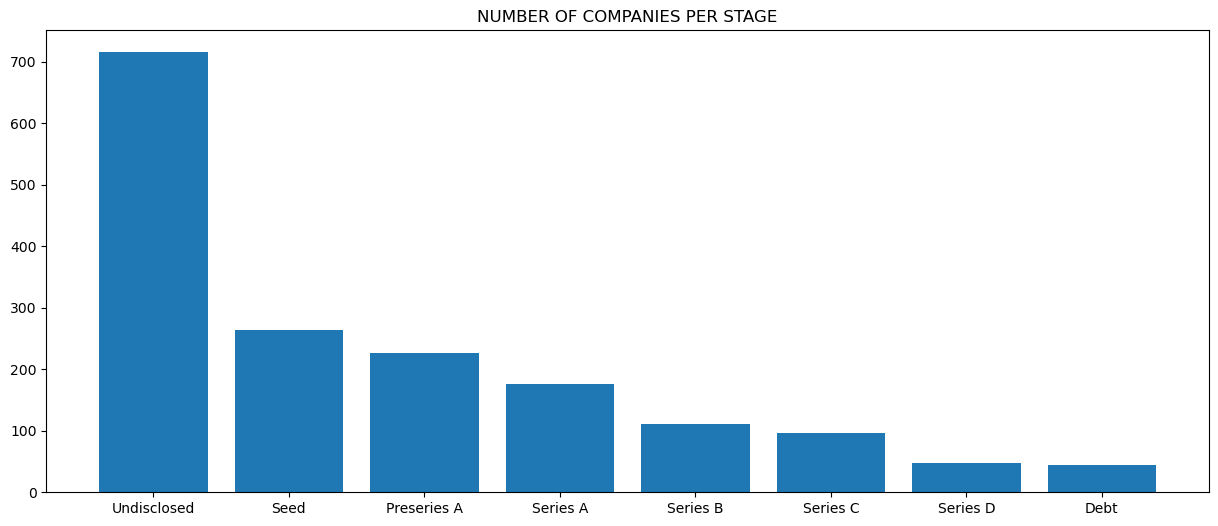

In [98]:
plt.figure(figsize=(15,6))
plt.bar(x, y, label='Bars1')
plt.title('NUMBER OF COMPANIES PER STAGE')

**Points to remember**

1. Our NaN values which amounts to 32 % of the column value have been renamed to undisclosed 

2. 'https://docs.google.com/spreadsheets/d/1x9ziNe...' found within out dataset was renamed to undisclosed


**OBSERVATIONS** 

Most companies did not disclose the level at which they received their respective funding and at what frequency it occured. Of the top ten companies , this happened to the tune of 38.65% I.e, out of the top ten companies which is 1850 companies, 715 choose to remain undisclosed. 

If we treat the companies with their stage undisclosed as outliers , the we'll find out that seed stage has the most number of companies and the Series E stage has the least number of companies. 

            1. undisclosed     715
            2. Seed            308
            3. Pre Series A    236
            4. Series A        226
            5. Series B        111
            6. Series C         96
            7. Series D         47
            8. Debt             45
            9. Pre-seed         43
           10. Series E         24
           
 
 All our NaN values were renamed to undisclosed, and in our **2018 dataset**, there was no stage column, therefore part of the reason for the high number of undisclosed values.

### ACTUAL INVESTIGATION 

In [99]:
## Further visualization for Question 1

funding_stage = new3.groupby('Stage')['Amount($)'].sum().reset_index()
funding_stage = funding_stage.sort_values(by = 'Amount($)', ascending = False)


<AxesSubplot:xlabel='Amount($)', ylabel='Stage'>

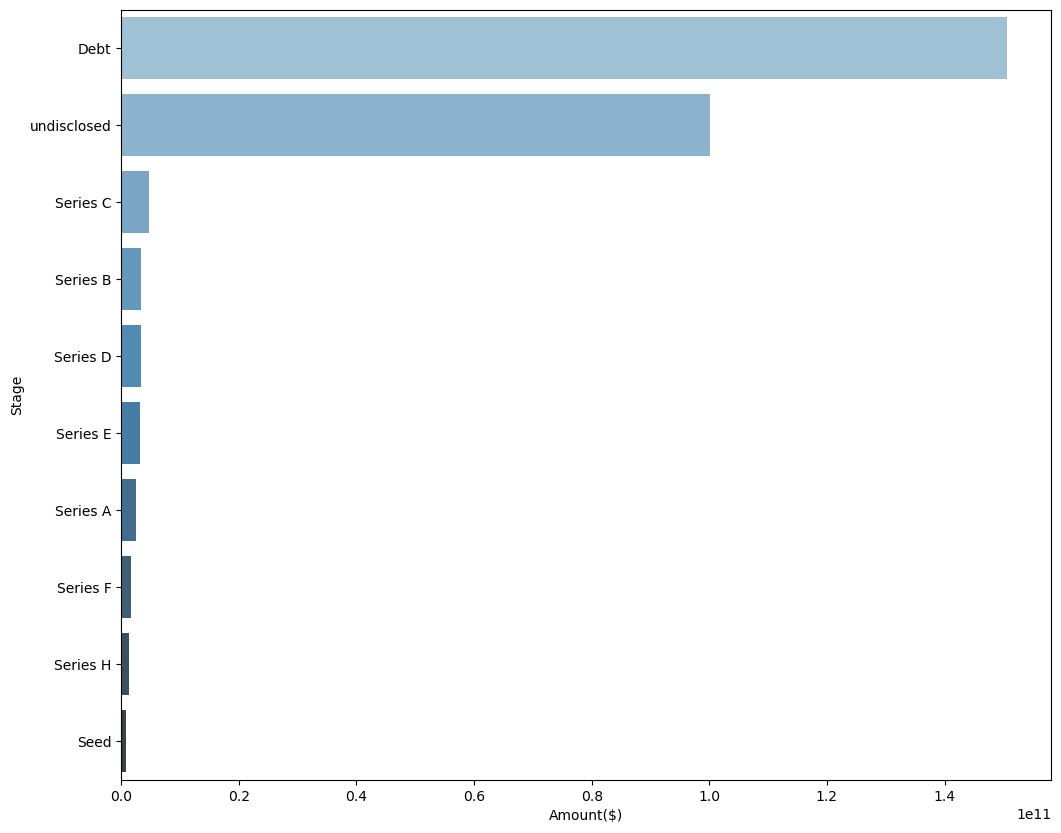

In [100]:

plt.figure(figsize=(12,10))

#plt.style.use('fivethirtyeight')
sns.barplot (y = "Stage", x = "Amount($)", palette="Blues_d", data = funding_stage.head(10))

The most funded stage is the debt stage, **ironically** it has only 45 companies to it against the 1850 companies. , This evidence will suggest that most investors fund companies in dire situations. 

Since a few number of companies are in the debt stage and alot of money is invested in this stage, it is understood that the individual companies receive alot of financial gain than other companies. 

# 2) DOES THE LOCATION AFFECT THE MOST FUNDED STAGES ?
?

From the above table if is observed that the **Debt**, **undisclosed** , **series C** ,  **seies B** and **series D** are the most funded stages, 
Do a deep dive on the location to see if location affects them , and if so by what margin 

In [101]:
new2.head(0)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founded,Founders,Investor


In [182]:

location_stage = new3.groupby('HeadQuarter')['Stage'].sum().reset_index()
location_stage = location_stage.sort_values(by = 'Stage', ascending = False)



# Get the value counts and ascend the value to see the location frequency, and if you can see duplicate values
k = pd.DataFrame(location_stage['HeadQuarter'].value_counts())
k = k.sort_values(by = 'HeadQuarter' ,ascending = False)

k

,HeadQuarter
Indore,1
San Francisco United States,1
Lucknow,1
London England United Kingdom,1
Ahmedabad,1
...,...
Uttar pradesh,1
Kanpur,1
Orissia,1
California,1


In [103]:
# Inspect for duplicate, mispelled words

#with pd.option_context('display.max_rows', None):
 #   print(k)
          


Location does'nt influence stage of funding signicantly, 
In the above locations we only have Delhi , and Carlifornia having **quite some** occurences

# 3 a) What are the top 10 most funded companies/sectors ?

#   b) What stage are the most funded companies/sectors ? 


In [104]:
new3.head(2)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founders,Investor
175,Bombay Shaving,Ecommerce,undisclosed,6300000,NaN,Provides a range of male grooming products,1970,Shantanu Deshpande,Sixth Sense Ventures
176,Ruangguru,Edtech,Series C,150000000,Mumbai,A learning platform that provides topic-based ...,1970,Adamas Belva Syah Devara Iman Usman.,General Atlantic


In [105]:

funded_companies = new3.groupby('Company/Brand')['Amount($)'].sum().reset_index()
funded_companies = funded_companies.sort_values(by = 'Amount($)', ascending = False)


#with pd.option_context('Display.max_rows', None):
#   print(funded_companies['Company/Brand'])

**INCONSINTENCIES FOUND WITHIN OUR DATA** 

 BJYU'S / Byju's / Byju / Bijnis / BJYU - BJYU (rename to BJYU)
 
 OYO / oyo / owo - Oyo ( rename to Oyo)
 

In [106]:
#Renaming the inconsistencies 

funded_companies.replace(to_replace = [ "BYJU'S", "Byju's" , "Byju", "Bijnis", "BJYU" ], value = ["BJYU", "BJYU", "BJYU", "BJYU", "BJYU"], inplace = True)

funded_companies.replace(to_replace = [ "OYO", "oyo", "owo"] , value = [ "Oyo", "Oyo", "Oyo"], inplace = True)

In [107]:
funded_companies.head(10)

,Company/Brand,Amount($)
42,Alteria Capital,150000000000
1045,Reliance Retail Ventures Ltd,70000000000
1159,Snowflake,3000000000
1042,Reliance,2200000000
1350,VerSe Innovation,1550000000
100,BJYU,1260000000
335,Dream Sports,1240000000
1449,Zomato,1029000000
180,Byju’s,1000000000
1225,Swiggy,956000000


<AxesSubplot:title={'center':'TOP 10 MOST FUNDED COMPANIES'}, xlabel='Amount($)', ylabel='Company/Brand'>

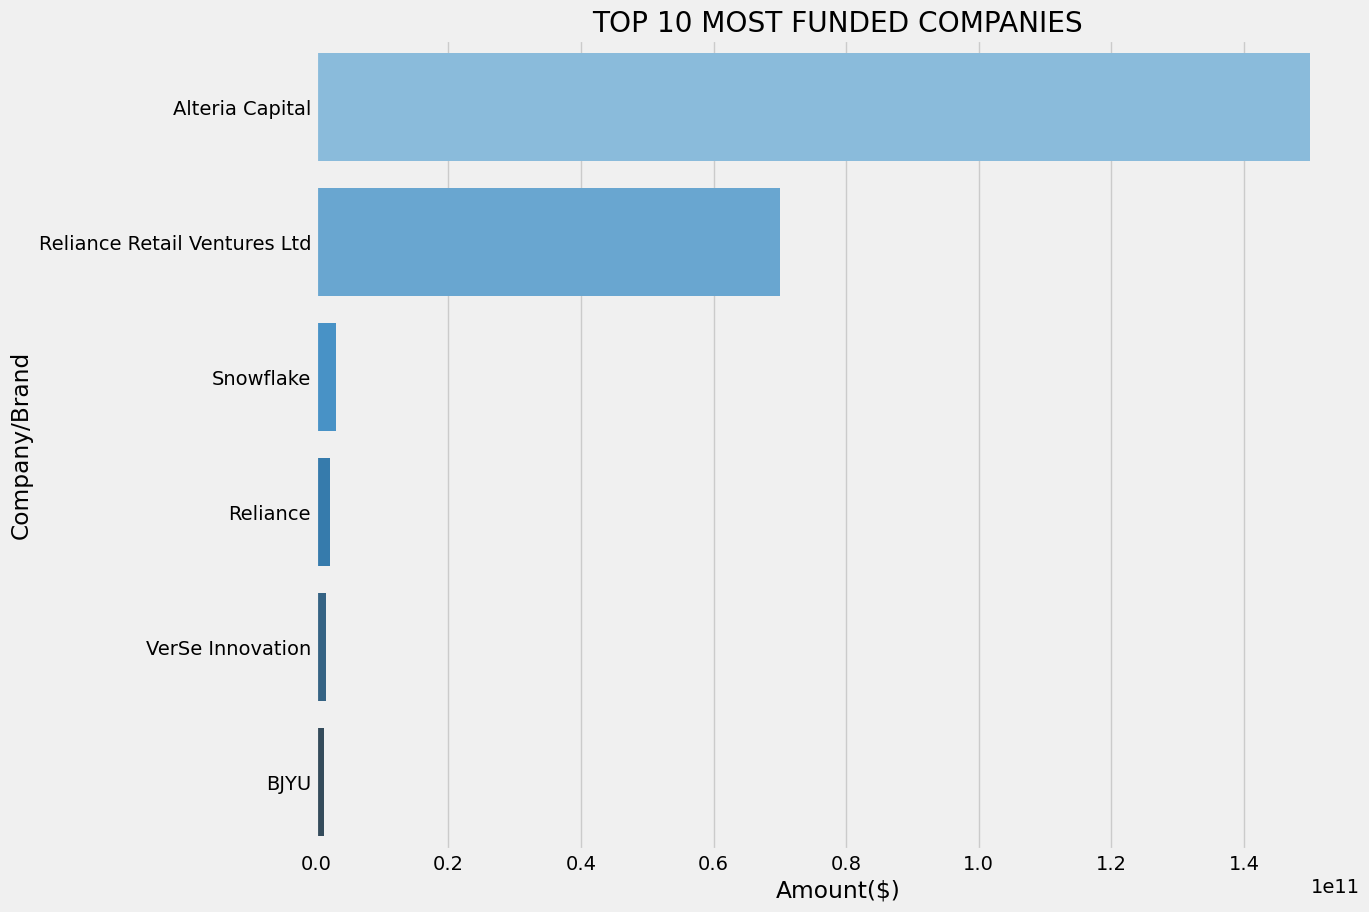

In [108]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,10))
plt.title('TOP 10 MOST FUNDED COMPANIES')
sns.barplot (y = "Company/Brand", x = "Amount($)", palette="Blues_d", saturation = 2.75,    data = funded_companies.head(6))

### Top 5 most funded companies are 
Alteria Capital

Reliance Retail Ventures Ltd

Snowflake

Reliance

VerSe Innovation

BJYU **(Subject to confirmation)**

#   b) What stage are the most funded companies/sectors (Top 20) ?

In [109]:
new3['Amount($)'].dtype

dtype('int64')

In [110]:
top_10_most_funded = new3[new3['Amount($)'] >= 590000000]

top_10_most_funded.head(10)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founders,Investor
260,Oyo,Hospitality,undisclosed,693000000,Gurugram,Provides rooms for comfortable stay,1970,Ritesh Agarwal,MyPreferred Transformation Avendus Finance Sof...
279,Zomato,Food Delivery,undisclosed,660000000,Gurgaon,Zomato is a food delivery and restaurant disco...,1970,Deepinder Goyal Gaurav Gupta Pankaj Chaddah,Kora Tiger Global Management
314,PhonePe,FinTech,undisclosed,700000000,New Delhi,PhonePe is a mobile payments application that ...,1970,Burzin Engineer Rahul Chari Sameer Nigam,Flipkart
544,Reliance Retail Ventures Ltd,Retail,undisclosed,70000000000,Mumbai,Reliance Retail offers online shopping and a c...,1970,Mukesh Ambani,Silver Lake Mubadala Investment Company
566,Reliance Retail Ventures,E-commerce,undisclosed,800000000,Mumbai,Reliance Retail offers online shopping and a c...,1970,Mukesh Ambani,General Atlantic Kohlberg Kravis Roberts
581,Snowflake,Tech company,undisclosed,3000000000,California,Snowflake is a cloud data platform that provid...,1970,Benoit Dageville Bob Muglia Marcin Zukowski Th...,Salesforce Ventures Dragoneer Investment Group
592,Reliance,Multinational conglomerate company,undisclosed,2200000000,Mumbai,Reliance owns businesses across India engaged ...,1970,Dhirubhai Ambani,Facebook Google KKR Silver Lake
1372,Swiggy,Food delivery,undisclosed,800000000,Bangalore,Swiggy is an on-demand food delivery platform ...,1970,Nandan Reddy Rahul Jaimini Sriharsha Majety,Carmignac Falcon Edge Capital
1392,Alteria Capital,FinTech,Debt,150000000000,Mumbai,Alteria Capital is a Venture debt firm .,1970,Vinod Murali,NaN
1665,VerSe Innovation,Innovation Management,Series H,1000000000,Bangalore,Owner of Dailyhunt App and I-Pay,1970,Virendra Gupta,Canaan Valley Capital Glade Brook Capital Part...


In [111]:
top_10_most_funded['Stage'].value_counts()

undisclosed    11
Debt            1
Series H        1
Name: Stage, dtype: int64

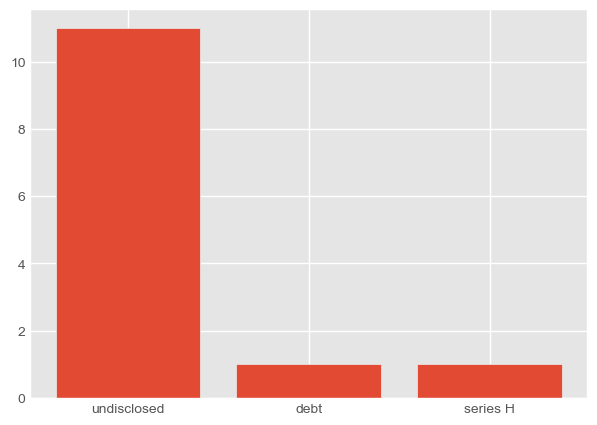

In [186]:
Stage = ['undisclosed', 'debt', 'series H']
frequency = [11, 1 ,1]

plt.bar( Stage , frequency)
#plt.title('Most funded company stage')

plt.show()

###  Surface findings 

All the top 12 most funded countries stage was undisclosed, but we had one company at **series H** and another at **Debt stage**, All these companies were formed before 2000, therefore for an assumption of steady growth, then all these companies were either at **Stage H or above Stage H**
  
  
**Since we are interested in the ecosystem company** We have not seen ecosystem companies being among the top ten most funded companies. Maybe we can find such in the lower quartile and such. 
 

# 4. What city/ location does the most funding go to ?

#    (Regardless of stage , since Question 2 addressed part of it)

In [112]:
new3.head(0)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founders,Investor


From the solution we had for our question 2, It is already established that there are more factors for funding of companiies, Nevertheless , The most funded companies in Series H , Debt and Disclosed were within the same location. 

In [113]:
funded_location = new3.groupby('HeadQuarter')['Amount($)'].sum().reset_index()
funded_location = funded_location.sort_values(by = 'Amount($)', ascending = False)

funded_location.head(10)

,HeadQuarter,Amount($)
51,Mumbai,228851999500
5,Bangalore,22210584358
31,Gurugram,5580231500
14,California,3078300000
53,New Delhi,2958752000
66,Pune,1361144000
16,Chennai,1017428146
30,Gurgaon,797563000
20,Delhi,761152200
57,Noida,544207000


<AxesSubplot:xlabel='Amount($)', ylabel='HeadQuarter'>

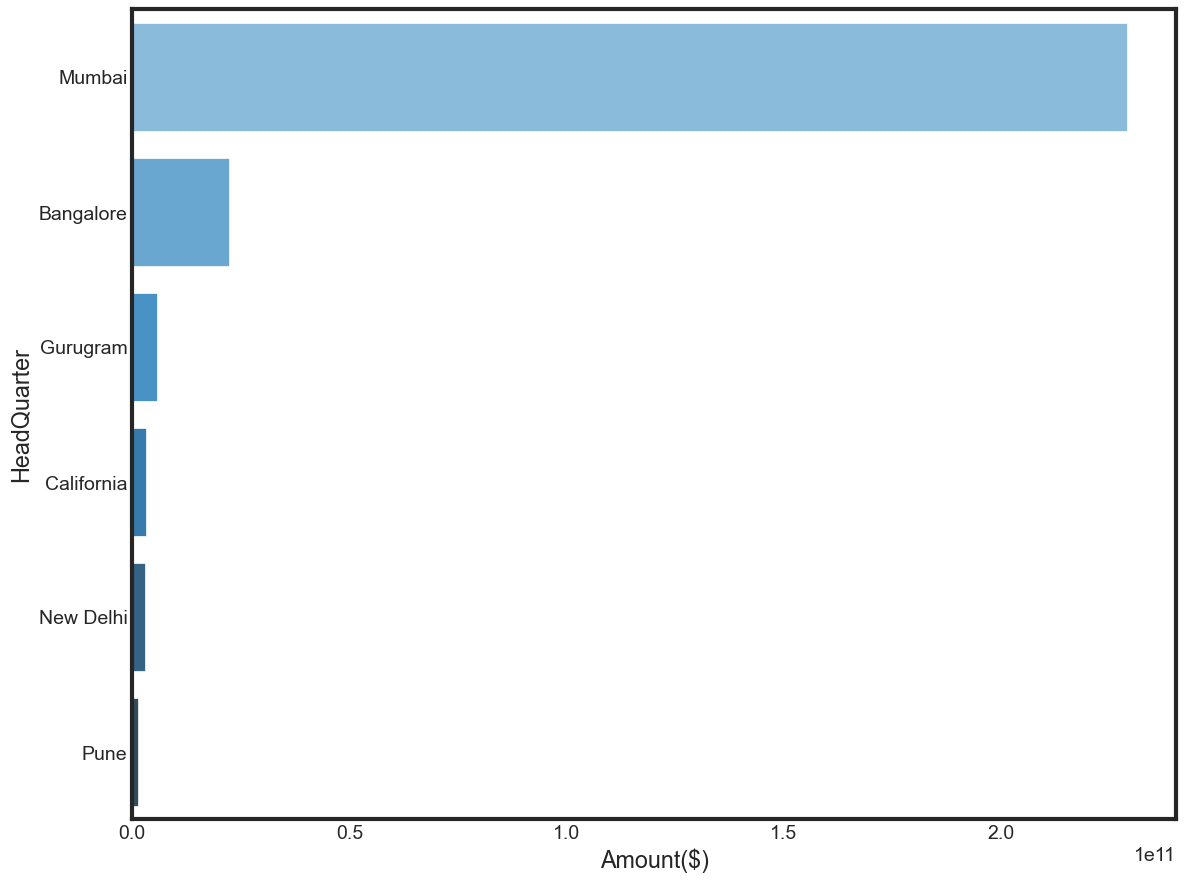

In [114]:
#plt.style.use('fivethirtyeight')
sns.set_style (style = 'white')
plt.figure(figsize=(12,10))
#plt.title('MOST FUNDED CITIES')
sns.barplot (y = "HeadQuarter", x = "Amount($)", palette="Blues_d", saturation = 2.75,    data = funded_location.head(6))

# 5. Who are the most Funding investors  ?



In [115]:
new3.head(2)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year,Founders,Investor
175,Bombay Shaving,Ecommerce,undisclosed,6300000,NaN,Provides a range of male grooming products,1970,Shantanu Deshpande,Sixth Sense Ventures
176,Ruangguru,Edtech,Series C,150000000,Mumbai,A learning platform that provides topic-based ...,1970,Adamas Belva Syah Devara Iman Usman.,General Atlantic


In [116]:
funded_investors = new3.groupby('Investor')['Amount($)'].sum().reset_index()
funded_investors = funded_investors.sort_values(by = 'Amount($)', ascending = False)

funded_investors.head(10)

,Investor,Amount($)
1156,Silver Lake Mubadala Investment Company,70000000000
1080,Salesforce Ventures Dragoneer Investment Group,3000000000
407,Facebook Google KKR Silver Lake,2200000000
1284,Tiger Global,1417000000
913,Owl Ventures Tiger Global Management,1200000000
293,Canaan Valley Capital Glade Brook Capital Part...,1000000000
413,Falcon Edge DST Global D1 Capital Redbird Capi...,840000000
299,Carmignac Falcon Edge Capital,800000000
459,General Atlantic Kohlberg Kravis Roberts,800000000
686,Kora Tiger Global Management,712000000


<AxesSubplot:xlabel='Amount($)', ylabel='Investor'>

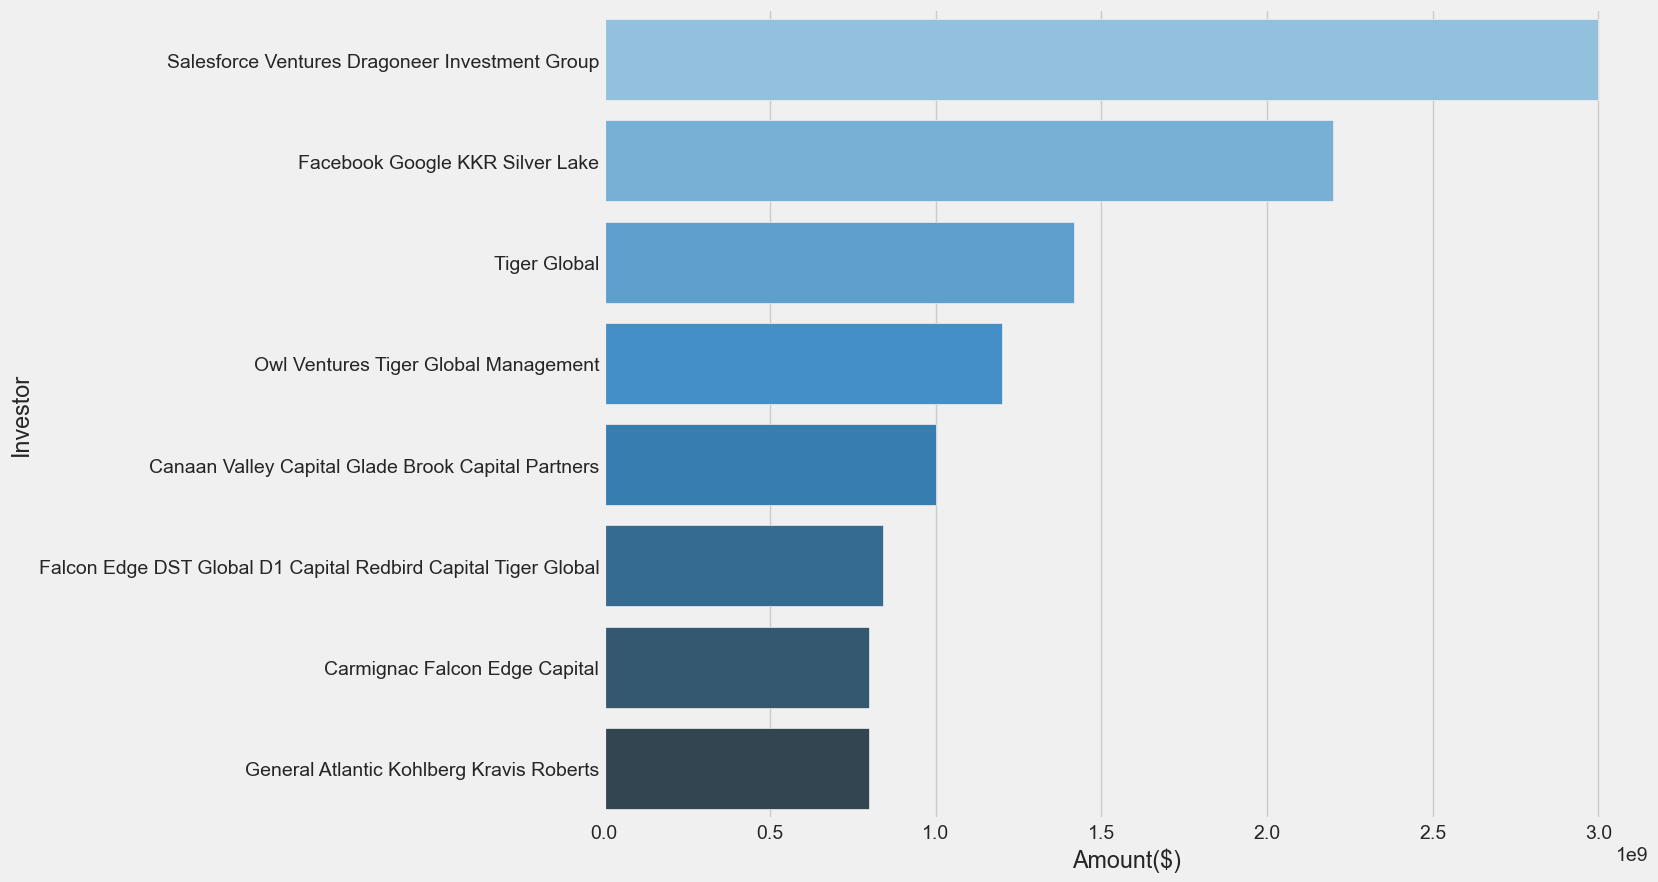

In [117]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,10))
#plt.title('MOST FUNDING INVESTORS')
sns.barplot (y = "Investor", x = "Amount($)", palette="Blues_d", saturation = 2.75,    data = funded_investors[1:9])

**IMPORTANT**

When plotting the overall top 10 most funding investors, It is important to note that we have sliced the first, most funding investor . Reason being Since **Silver Lake Mubadala Investment Company , the most funding company** has a large amount of funding I.e; more than twice of the most funding investor, We removed it , so as to compare the distribution between the other funding investors. 

**Later in PowerBI we an add a card of the most funded investor**


since our question is particularly interested in the most funding investors for the 2019, 2020 dataset and compare the most funding investor trend over the years .....

# 6 What has the funding over the years trend been like ?

##   a) What year was the most funding given ?

##   b) What is the average funding for every year ?

##   c) What is the % increase in funding from year to year ?

In [122]:
new2['Year'].value_counts()

2021    1056
2020     802
2019      77
Name: Year, dtype: int64

In [123]:
total_funding_received = new2['Amount($)'].astype('int64')

total_funding_received.sum()

273699821804

In [124]:
# we are locating the columns according to their years |

funding_2019 = new2.loc[new2['Year']=='2019']
funding_2020 = new2.loc[new2['Year']=='2020']
funding_2021 = new2.loc[new2['Year']=='2021']

In [125]:
# Converting the Amount column into integer so as to sum the values

funding_sum_2019 = funding_2019['Amount($)'].apply(int)
funding_sum_2020 = funding_2020['Amount($)'].apply(int)
funding_sum_2021 = funding_2021['Amount($)'].apply(int)

In [126]:
# Print out the funding amount yearly

print ('2019 total fund received is ', funding_sum_2019.sum(), '\n')
print ('2020 total fund received is ', funding_sum_2020.sum() , '\n')
print ('2021 total fund received is ', funding_sum_2021.sum(), '\n' )
print ('The total amount of funding received is ', total_funding_received.sum() )

2019 total fund received is  3336433200 

2020 total fund received is  90549976604 

2021 total fund received is  179813412000 

The total amount of funding received is  273699821804


In [127]:
# pass the results in a dataframe 
fund = {'2019': 3336433200 , '2020': 90549976604 , '2021':179813412000 }
fund

{'2019': 3336433200, '2020': 90549976604, '2021': 179813412000}

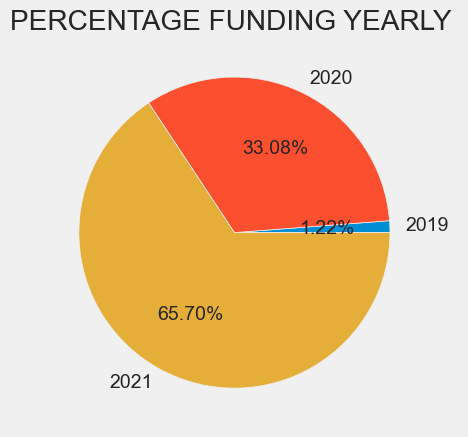

In [128]:
# plot pie chart to visualize most funded year

year = ['2019', '2020', '2021']
amount = [3336433200, 90549976604, 179813412000]
plt.title('PERCENTAGE FUNDING YEARLY ')
plt.pie(x=amount, labels= year, autopct='%.2f%%')

plt.show()

## 6 B) What is the average funding for every year

In [129]:
# check the frequency of occurence per year
new2['Year'].value_counts()

2021    1056
2020     802
2019      77
Name: Year, dtype: int64

In [130]:
# check the amount 
fund

{'2019': 3336433200, '2020': 90549976604, '2021': 179813412000}

In [131]:
average_2019 = 3336433200/1056
average_2020 = 90549976604/ 802
average_2021 = 179813412000/77

In [132]:
print ('2019 average funding was ' ,average_2019, '\n')
print ('2020 average funding was ' ,average_2020, '\n')
print ('2021 average funding was ' ,average_2021, '\n')

2019 average funding was  3159501.1363636362 

2020 average funding was  112905207.73566085 

2021 average funding was  2335239116.8831167 



In as much as we would like to know the average of funding per year, we have to understand that the number of companies receiving fundings has been increasing exponentially over the years, I.e;, we had **77 companies in 2019, 802 companies in 2020 and 1056 companies in 2021** , therefore the average or mean value of funding per year will make us make more informed decison on the funding trend 

In [133]:
year = ['2019','2020','2021']
amount = [3336433200,90549976604, 179813412000 ]
companies = [77, 802, 1056]

kik = [companies, amount]

# pass the results into a dataframe    
kik2 = pd.DataFrame(kik)

# renaming columns
kik2 = kik2.rename(columns = 
                  {0 : '2019',
                   1 : '2020',
                   2 : '2021'})
# renaming index
x = kik2.rename(index={0: "companies", 1: "amount in $"})
  

#see the results 
x

,2019,2020,2021
companies,77,802,1056
amount in $,3336433200,90549976604,179813412000


<AxesSubplot:title={'center':'AVERAGE FUNDING PER YEAR'}>

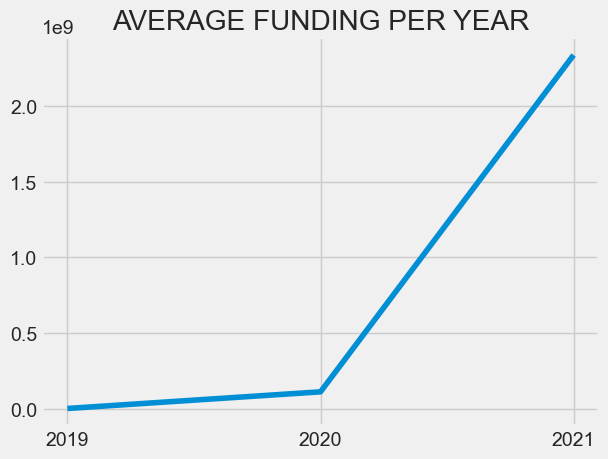

In [134]:
year = ['2019','2020','2021']
amount = [3336433200,90549976604, 179813412000 ]
companies = [77, 802, 1056]

average = [average_2019, average_2020, average_2021]

plt.title('AVERAGE FUNDING PER YEAR')
sns.lineplot(x = year,y = average ) #hue=companies )
    
#plt.(x = year, y = average, hue = companies) #hue=companies )

## 6c) What is the percentage increase of funding from year to year 

Because we had different number of companies receiving the funding, we will use the average funding received per year to find the % increase as opposed to the total amount of finding received 

In [135]:
# Recall the average for every year

print (average_2019)
print (average_2020)
print (average_2021)

3159501.1363636362
112905207.73566085
2335239116.8831167


**To get the subsequent year percentage increase**

     if   this_year  = 100%
     
     then next_year  = ( next_year X 100 ) / this_year
     
**Taking 2019 year to be 100% since it is our start year**

In [136]:
increase1 = ((average_2020*100)/average_2019)-100
increase2 = ((average_2021*100)/average_2020)-100

In [137]:
print ('2019  % is taken as 100 ')
print ('2019 - 2020 % change is ', increase1)
print ('2020 - 2021 % change is ', increase2)

2019  % is taken as 100 
2019 - 2020 % change is  3473.5137562130085
2020 - 2021 % change is  1968.3183386460719


<AxesSubplot:title={'center':'percentage increase in funding from year to year'}>

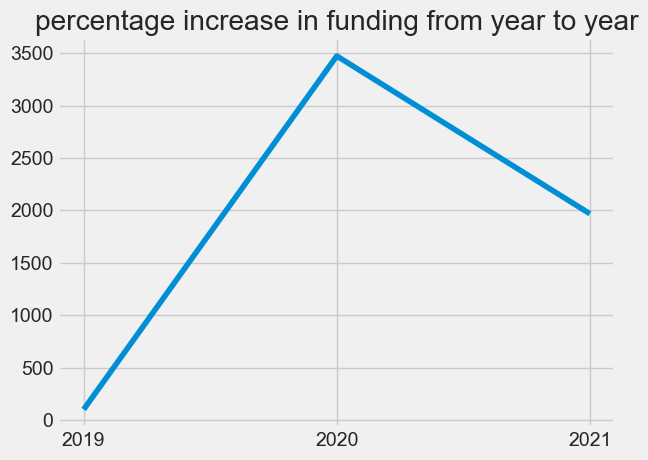

In [138]:
year = ['2019','2020','2021']
increase = [100 , 3473, 1968 ]


plt.title('percentage increase in funding from year to year')
sns.lineplot(x = year,y = increase ) 
    




We left out the 2018 dataset in this analysis but cound still recognize an encouraging trend on the amount on funding over the years. 

**OBSERVATIONS**
   *Of The total funding received thus far*
   
      - 2019 has 1 % of the total funding amount, average of 3159501
      
      - 2020 has 33 % of the total funding amount, average of 112905207
      
      - 2021 has 66 % of the total funding amount, average of 2335239116
      
  *Of the 1935 companies funded so far*
      
       - 2019 has 77 companies i.e, 3.9% of the companies
       
       - 2020 has 802 companies i.e, 41.44 % of the companies
       
       - 2021 has 1035 companies i.e, 53.5 % of the companies
      
There's is absolutely an encouraging trend on the amount of funding the companies have been receiving over the years ( Average),

Despite the number of companies that receive funding increase, there average amount received is still increasing over the years. 

# 6 d)  The number of  companies each year 

In [155]:
x

,2019,2020,2021
companies,77,802,1056
amount in $,3336433200,90549976604,179813412000


In [156]:
x.T

,companies,amount in $
2019,77,3336433200
2020,802,90549976604
2021,1056,179813412000


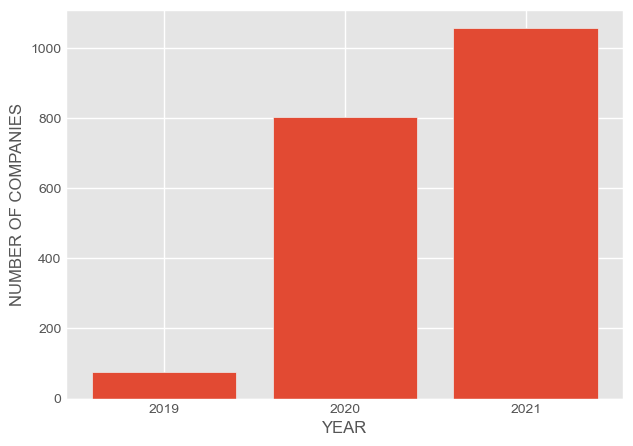

In [176]:
year = ['2019', '2020', '2021']

number_of_companies = [77, 802, 1056] 

amount_received = [3336433200 , 90549976604, 179813412000 ]
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF COMPANIES')
#plt.title("Number of companies per year")

plt.bar(  year , number_of_companies)

plt.show()

# DEEP DIVE ON UNDISCLOSED STAGE SERIES

# a ) What is the percentage funding received by companies that didn't disclose their stages

In [139]:
# Get the amount received for undisclosed column

undisclosed = new2.loc[new2['Stage']=='undisclosed']

In [140]:
# Get the total amount received

total = new2['Amount($)'].apply(int).sum()

In [141]:
# amount recived for disclosed vs undisclosed 

amount_received_undisclosed = undisclosed['Amount($)'].apply(int).sum()

amount_received_disclosed = total - amount_received_undisclosed

In [142]:
# show the results for undisclosed and disclosed

print ('Total amount for undisclosed column is ', amount_received_undisclosed )
print ('Total amount for disclosed column is ', amount_received_disclosed)

Total amount for undisclosed column is  100181039074
Total amount for disclosed column is  173518782730


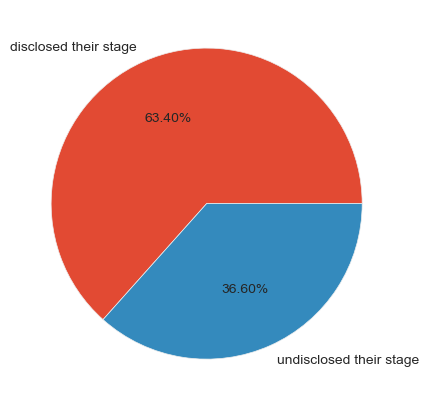

In [143]:
# create a visual for comparison of amount received in disclosed vs undisclosed 
plt.title = ('Amount received disclosed vs undisclosed')
labels = ['disclosed their stage', 'undisclosed their stage']
amount = [173518782730 , 100181039074]
plt.style.use('ggplot')
plt.pie(x = amount, labels= labels , autopct = '%.2f%%' )


plt.show()

# b) Which sectors were willing to disclose their funding stages to the public

In [144]:
undisclosed['Sector'].value_counts().head(15)

FinTech                              57
EdTech                               37
E-commerce                           29
Edtech                               24
Fintech                              22
Financial Services                   16
Gaming                               14
Information Technology & Services    13
Healthtech                           11
AgriTech                             11
Food & Beverages                     11
Logistics                            11
Media                                11
Healthcare                           10
Consumer Goods                       10
Name: Sector, dtype: int64

In [145]:
new2['Sector'].value_counts().head(15)

FinTech                              152
EdTech                               114
Fintech                               70
E-commerce                            67
Financial Services                    58
Edtech                                56
AgriTech                              39
Information Technology & Services     36
Gaming                                31
Food & Beverages                      31
Automotive                            31
Logistics                             29
Healthcare                            26
Healthtech                            23
Media                                 23
Name: Sector, dtype: int64

In [146]:
Fintech = ( 79 / 222 ) * 100
EdTech =  ( 61 / 170 ) * 100
Ecommerce =    (29   / 67) * 100
Financial_Services =( 16 / 58) * 100
AgriTech = (11 / 39) * 100
Information_Technology_Services = (13 / 36) * 100
Gaming = (14 / 31) * 100
Food_Beverages = (11 / 31) * 100


In [147]:
dict1 = { 'Fintech': 36, 
'EdTech' : 36, 
'Ecommerce' : 43, 
'Financial_Services': 28,
'AgriTech' : 28,
'Information_Technology_Services': 36,
'Gaming' : 45,
'Food_Beverages': 35}

list1 = ['Fintech', 'EdTech', 'Ecommerce', 'Financial_Services', 'AgriTech', 'Information_Technology_Services', 'Gaming','Food_Beverages']
percentage = ['36%', '36%', '43%', '28%', '28%', '36%', '45%', '35%']

per = [list1, percentage]

#pass results into a DataFrame

per2 = pd.DataFrame(per)

# renaming columns
#per2 = per2.rename(columns = 
                 #{0 : 'Company Sector',
                  #1 : ' % that remained undisclosed',
                 #})
# renaming index
x2 = per2.rename(index={0: "Company Sector", 1: "% that remained undisclosed"})

In [148]:
x2.T

,Company Sector,% that remained undisclosed
0,Fintech,36%
1,EdTech,36%
2,Ecommerce,43%
3,Financial_Services,28%
4,AgriTech,28%
5,Information_Technology_Services,36%
6,Gaming,45%
7,Food_Beverages,35%


The above DataFrame shows the top 8 companies, and the percentage that choose to remain undisclosed 

# HYPOTHESIS TESTING

### Hypothesis
      Funding has been increasing over the years
### Alternate Hypothesis
  Funding has remained constant over the years

In [149]:
# This has been clear from our answered questions set, To confirm we'll do a hypothesis test

In [150]:
from scipy import stats
import statistics as stat
import math 

Since we are comparing between 3 values that are ascending, i.e, each value based on the next preceding value ... we will use t test , But specify year to year so that if  **p > 0.05 more than twice we accept our Null Hypothesis**

We have set our significant value to be 10%

In [151]:
# for 2019 - 2020
t, p = stats.ttest_ind( funding_2019 ['Amount($)'].apply(int), funding_2020 ['Amount($)'].apply(int))

print('t value is ', t)
print('p value is' , p)

t value is  -0.2465141518309328
p value is 0.8053419384289421


In [152]:
# for 2020 - 2021
t, p = stats.ttest_ind( funding_2020 ['Amount($)'].apply(int), funding_2021 ['Amount($)'].apply(int))

print('t value is ', t)
print('p value is' , p)

t value is  -0.3188898408940505
p value is 0.7498459312778636




Our p value is > than our significant value, Then we accept our Null Hypothesis. 

**Funding has been increasing over the years**

## export our combined dataset into a csv format for powerBi

In [153]:
# convert the file to csv 

dataset = new3.to_csv('combined_dataset_analysis.csv')

In [154]:
import os
print("PYTHONPATH:", os.environ.get('PYTHONPATH'))
print("PATH:", os.environ.get('PATH'))

PYTHONPATH: None
PATH: C:\Users\user\anaconda3;C:\Users\user\anaconda3\Library\mingw-w64\bin;C:\Users\user\anaconda3\Library\usr\bin;C:\Users\user\anaconda3\Library\bin;C:\Users\user\anaconda3\Scripts;C:\Users\user\anaconda3\bin;C:\Users\user\anaconda3\condabin;C:\Users\user\anaconda3;C:\Users\user\anaconda3\Library\mingw-w64\bin;C:\Users\user\anaconda3\Library\usr\bin;C:\Users\user\anaconda3\Library\bin;C:\Users\user\anaconda3\Scripts;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files (x86)\dotnet;C:\Program Files\MySQL\MySQL Server 8.0\bin;C:\Program Files\Azure Data Studio\bin;C:\Program Files\Git\cmd;X:\ProgramData\Anaconda3;X:\ProgramData\Anaconda3\Script;X:\ProgramData\Anaconda3\Library\bin;C:\Users\user\AppData\Local\Programs\Python\Python310\Scripts;C:\Users\user\AppData\Local\Programs\Python\Python310;C:\Users\user\AppData\Local\Microsoft\WindowsApps;.;C:\Users\user\AppData\Local\Progr